In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    rmse = mean_squared_error(y, y_pred, squared=False)
    return rmse

In [17]:
def get_xgboost_model():
    model = XGBRegressor(
        objective="reg:linear",
        random_state=seed,
        #tree_method="gpu_hist",
        #predictor="gpu_predictor",
        verbosity=0,
    )
    return model

In [18]:
warnings.filterwarnings("ignore")
seed=47

In [19]:
df = pd.read_csv(
    "../../../../data/interim/partner_iii/Dati CADD 2020-2022_without_fillna.csv"
)

# XGBoost Gradient

In [20]:
y = df.pop("28d compressive strength (MPa)").values
x = df.values

In [21]:
model = get_xgboost_model()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
scores = cross_val_score(
    model, x, y, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1
)
scores = np.abs(scores)
print("RMSE: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

RMSE: 3.771 (0.433)


<h3>Plot of feature importance</h3>

3.3415571071025907


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 720x720 with 0 Axes>

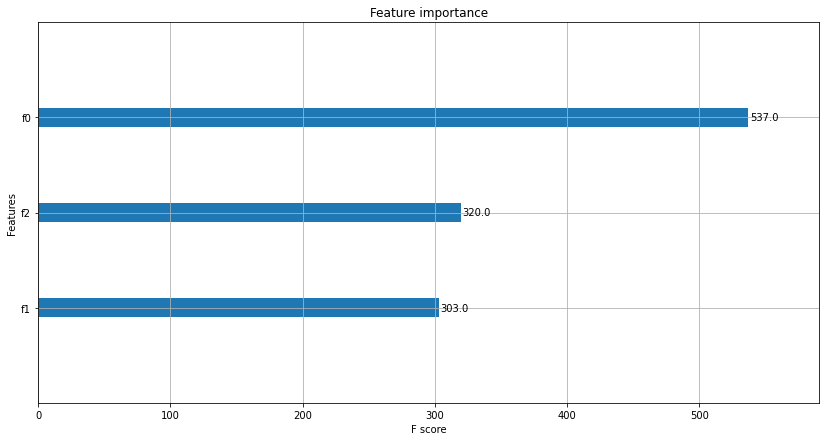

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=seed
)
model = get_xgboost_model()
model.fit(x_train, y_train, verbose=True)
score = evaluate_model(model, x_test, y_test)
print(score)
plt.figure(figsize=(10, 10))
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model)